In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [6]:
transactions_customers = transactions.merge(customers, on="CustomerID", how="left")
full_data = transactions_customers.merge(products, on="ProductID", how="left")


In [7]:
print("Merged Dataset Preview:")
print(full_data.head())

Merged Dataset Preview:
  TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   
2        T00166      C0127      P067  25-04-2024 07:38         1      300.68   
3        T00272      C0087      P067  26-03-2024 22:55         2      601.36   
4        T00363      C0070      P067  21-03-2024 15:10         3      902.04   

   Price_x     CustomerName         Region  SignupDate  \
0   300.68   Andrea Jenkins         Europe  03-12-2022   
1   300.68  Brittany Harvey           Asia  04-09-2024   
2   300.68  Kathryn Stevens         Europe  04-04-2024   
3   300.68  Travis Campbell  South America  11-04-2024   
4   300.68    Timothy Perez         Europe  15-03-2022   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth S

In [8]:
print("\nMissing Values:")
print(full_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [9]:
print("\nDescriptive Statistics:")
print(full_data.describe())



Descriptive Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [18]:
duplicates = full_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [10]:
print("\nUnique Regions:", full_data['Region'].unique())
print("Unique Categories:", full_data['Category'].unique())


Unique Regions: ['Europe' 'Asia' 'South America' 'North America']
Unique Categories: ['Electronics' 'Clothing' 'Books' 'Home Decor']


In [11]:
region_sales = full_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)


Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [12]:
category_sales = full_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nTotal Sales by Category:")
print(category_sales)


Total Sales by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [13]:
region_avg_transaction = full_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
print("\nAverage Transaction Value by Region:")
print(region_avg_transaction)


Average Transaction Value by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


In [14]:
top_customers = full_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Purchase Value:")
print(top_customers)



Top 5 Customers by Total Purchase Value:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [19]:
top_products = full_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Most Purchased Products:")
print(top_products)


Top 5 Most Purchased Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [20]:
transaction_frequency = full_data.groupby("CustomerID")["TransactionID"].nunique()
repeat_customers = transaction_frequency[transaction_frequency > 1].count()
one_time_customers = transaction_frequency[transaction_frequency == 1].count()
print(f"\nRepeat Customers: {repeat_customers}, One-Time Customers: {one_time_customers}")



Repeat Customers: 187, One-Time Customers: 12


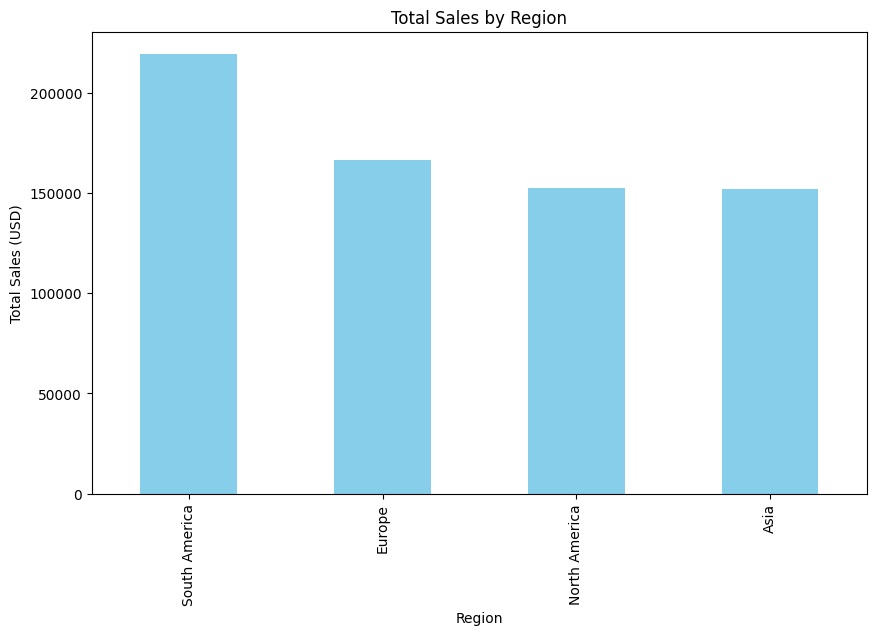

In [15]:
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue', title='Total Sales by Region')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Region')
plt.show()

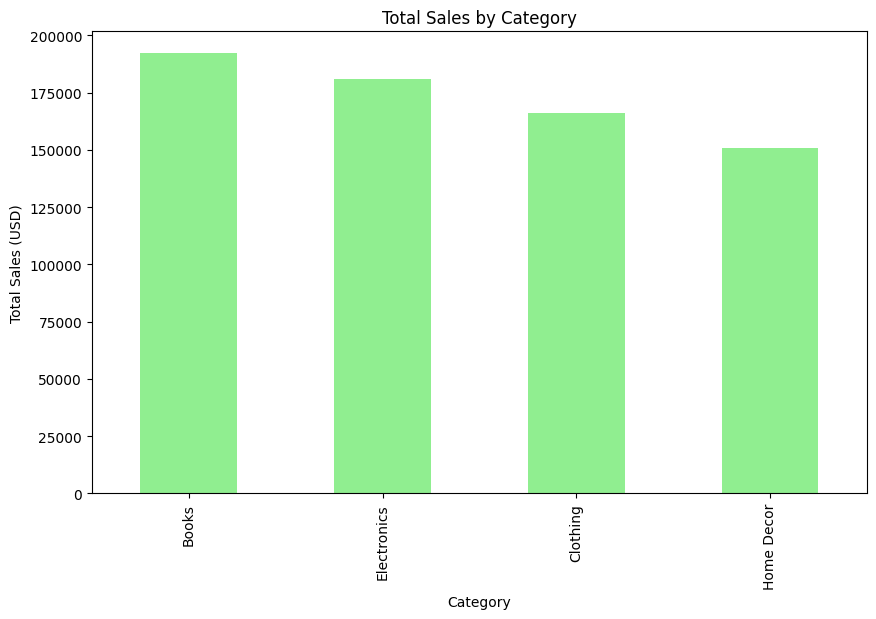

In [16]:
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen', title='Total Sales by Category')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Category')
plt.show()

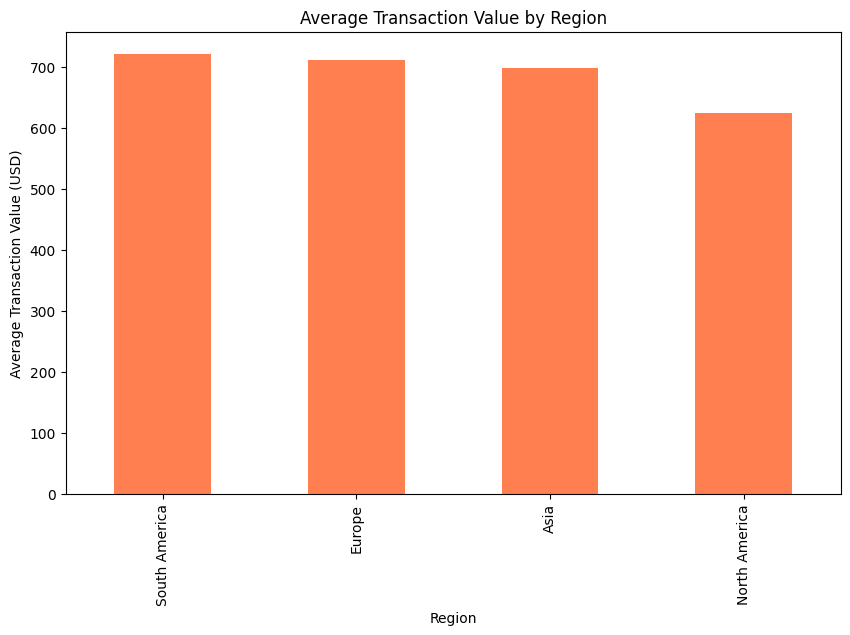

In [17]:
plt.figure(figsize=(10, 6))
region_avg_transaction.plot(kind='bar', color='coral', title='Average Transaction Value by Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xlabel('Region')
plt.show()

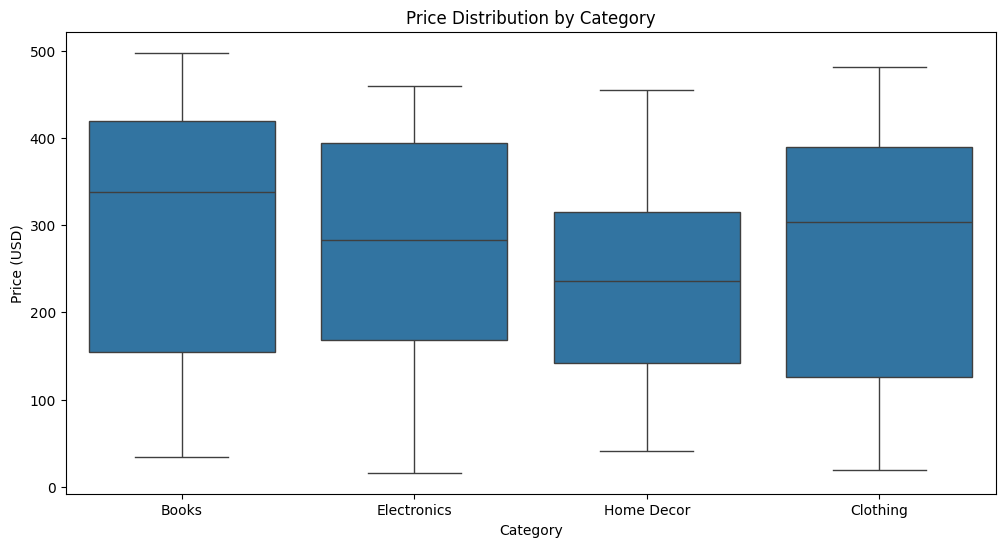

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x="Category", y="Price")
plt.title("Price Distribution by Category")
plt.ylabel("Price (USD)")
plt.xlabel("Category")
plt.show()

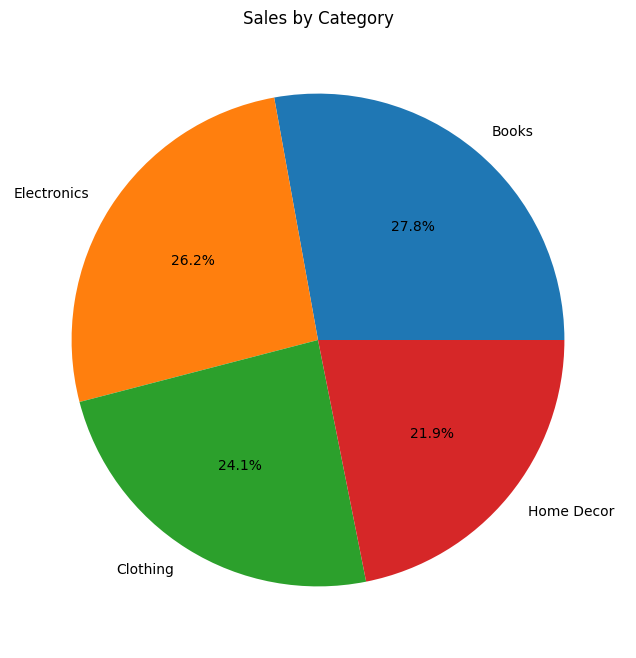

In [23]:
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Sales by Category')
plt.ylabel('')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_23284\3777669552.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])


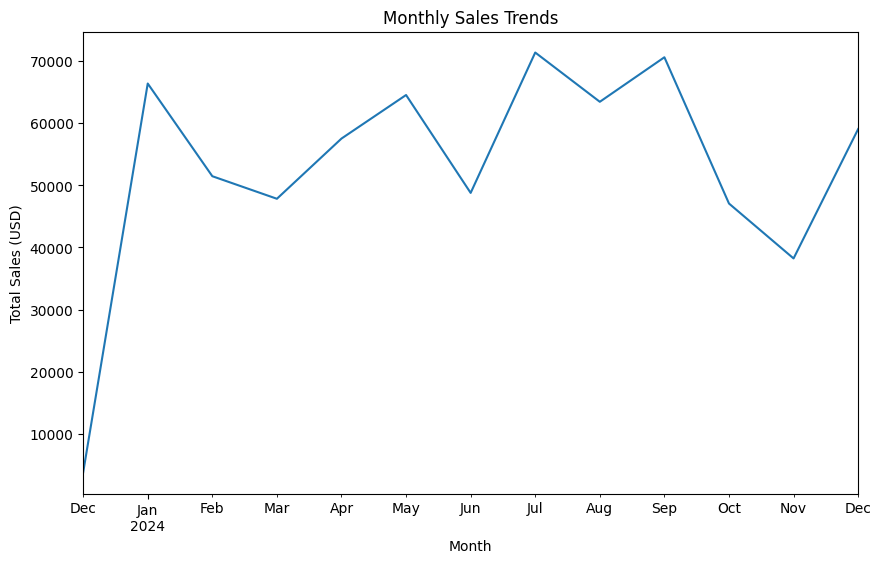

In [24]:
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])
monthly_sales = full_data.groupby(full_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Month')
plt.show()